# Programa de capacitação

**Sistemas ópticos coerentes**

Adolfo Fernandes Herbster

Essentials of Signal Processing

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2018

# Reviewer

In [1]:
import numpy as num
import matplotlib.pyplot as plt
import sk_dsp_comm.sigsys as ss

In [2]:
N  = 2**10; # number of bits
Fb = 10;    # bit rate   [bps]
Tb = 1/Fb;  # Bit period [s]
Ns = 32;    # samples per bit
Fs = Fb*Ns  # sample rate

In [3]:
x1, b1, d1 = ss.NRZ_bits(N, Ns, 'rect');
alpha = 0.35;
x2, b2, d2 = ss.NRZ_bits(N, Ns, 'src', alpha);
t1 = num.arange(0,N/Fb,1/Fs);
NFFT  = N * Ns/2;
f1, X1 = ss.ft_approx(x1, t1, NFFT);
f2, X2 = ss.ft_approx(x2, t1, NFFT);

C:\Users\Adolfo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


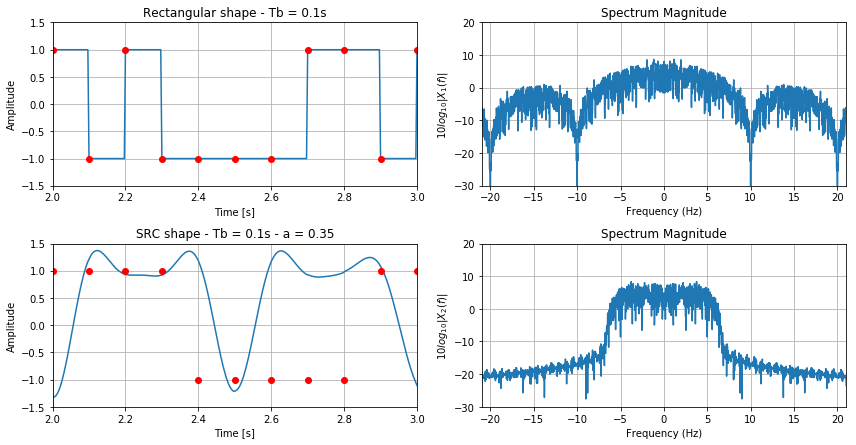

In [4]:
plt.figure(figsize=(12,12))
plt.subplot(421)
plt.plot(t1, x1,
         t1[0::Ns], 2*d1-1, 'ro');
plt.grid();
plt.xlim([2,3]);
plt.ylim([-1.5,1.5]);
plt.title(r'Rectangular shape - Tb = ' + repr(Tb) + 's');
plt.xlabel(r'Time [s]');
plt.ylabel(r'Amplitude');

plt.subplot(422)
plt.plot(f1, 10*num.log10(num.abs(X1)));
plt.grid()
plt.xlim([-21,21])
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude')
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$10log_{10}|X_1(f)|$');

plt.subplot(423)
plt.plot(t1, x2,
         t1[0::Ns], 2*d2-1, 'ro');
plt.grid();
plt.xlim([2,3]);
plt.ylim([-1.5,1.5]);
plt.title(r'SRC shape - Tb = ' + repr(Tb) + 's - a = ' + repr(alpha));
plt.xlabel(r'Time [s]');
plt.ylabel(r'Amplitude');

plt.subplot(424)
plt.plot(f2, 10*num.log10(num.abs(X2)));
plt.grid()
plt.xlim([-21,21]);
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude')
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$10 log_{10}|X_2(f)|$');
plt.tight_layout()

To see the pulse shape effect in the digital system, we create the BPSK modulated signal using two frequencies (10 Hz and 25 Hz) and evaluate the interpose between their spectrums.

In [5]:
Fc1 = 10; # Carrier #01 - 10 Hz
Fc2 = 25; # Carrier #02 - 25 Hz

# RECT shape
x1_c = x1*num.cos(2*num.pi*Fc1*t1);
x3_c = x1*num.cos(2*num.pi*Fc2*t1);
f1, X1_c = ss.ft_approx(x1_c, t1, NFFT);
f1, X3_c = ss.ft_approx(x3_c, t1, NFFT);
# SRC shape
x2_c = x2*num.cos(2*num.pi*Fc1*t1);
x4_c = x2*num.cos(2*num.pi*Fc2*t1);
f2, X2_c = ss.ft_approx(x2_c, t1, NFFT);
f2, X4_c = ss.ft_approx(x4_c, t1, NFFT);

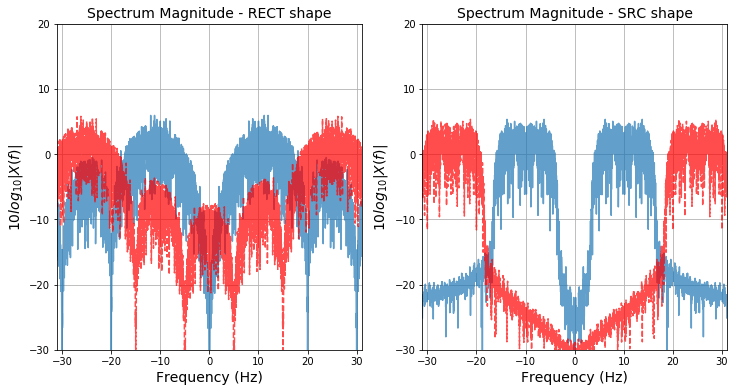

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(f1, 10*num.log10(num.abs(X1_c)),
         f2, 10*num.log10(num.abs(X3_c)), 'r--', alpha = 0.70);
plt.grid()
plt.xlim([-31,31])
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude - RECT shape', fontsize = 14)
plt.xlabel(r'Frequency (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

plt.subplot(122)
plt.plot(f1, 10*num.log10(num.abs(X2_c)),
         f2, 10*num.log10(num.abs(X4_c)), 'r--', alpha = 0.70);
plt.grid()
plt.xlim([-31,31])
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude - SRC shape', fontsize = 14)
plt.xlabel(r'Frequency (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

# Eye plot

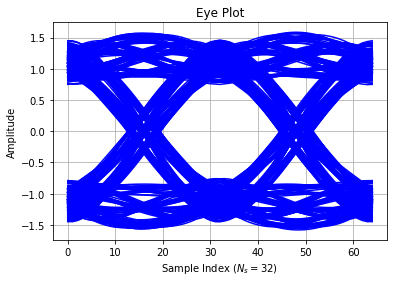

In [7]:
ss.eye_plot(x2, 2*Ns, 10*Ns)
plt.xlabel('Sample Index ($N_s = ' + repr(Ns) + '$)');

# Scatter plot

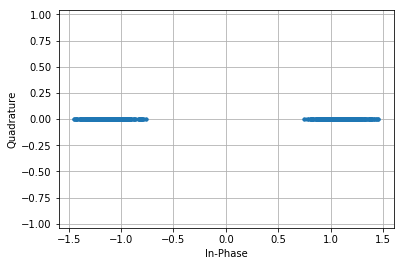

In [8]:
yI, yQ = ss.scatter(x2, Ns, 10*Ns)
plt.plot(yI,yQ,'.')
plt.axis('equal')
plt.ylabel("Quadrature")
plt.xlabel("In-Phase")
plt.grid()
plt.show()

# Complex AWGN and Filtering

In [9]:
from scipy import signal

# Channel
EbN0_dB = 20;
r2_c = ss.cpx_AWGN(x2_c, EbN0_dB, Ns);  # r2_c = x2_c + complex_noise
f1, R2_c = ss.ft_approx(r2_c, t1, NFFT);

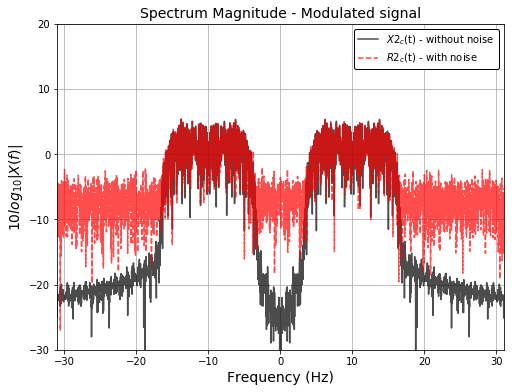

In [10]:
plt.figure(figsize=(8,6))
plt.plot(f1, 10*num.log10(num.abs(X2_c)), 'k',
         f2, 10*num.log10(num.abs(R2_c)), 'r--', alpha = 0.70);
plt.grid()
plt.xlim([-31,31])
plt.ylim([-30,20])
plt.title(r'Spectrum Magnitude - Modulated signal', fontsize = 14)
plt.xlabel(r'Frequency (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);
plt.legend(['$X2_c}$(t) - without noise', '$R2_c$(t) - with noise'], framealpha = 1, edgecolor = 'k');

At the receiver, we demodulate the signal (with noise) before filtered this signal using the same pulse shape used in the transmitter.

In [11]:
# Receiver
x2_r = r2_c*num.cos(2*num.pi*Fc1*t1);     # demodulated signal with noise
z2_r = signal.lfilter(b2, 1, x2_r);       # filtered signal
f2, X2_r = ss.ft_approx(x2_r, t1, NFFT);
f2, Z2_r = ss.ft_approx(z2_r, t1, NFFT);

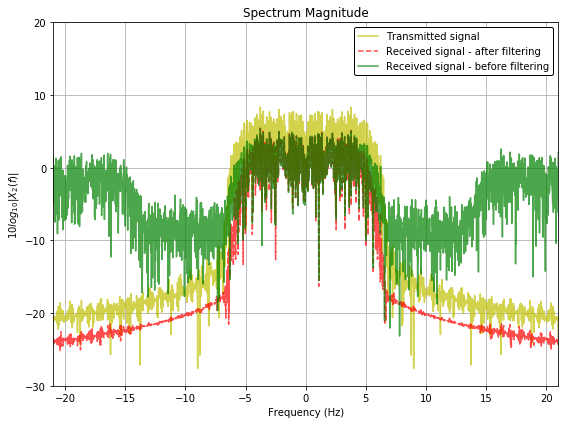

In [12]:
plt.figure(figsize=(8,6))
plt.plot(f2, 10*num.log10(num.abs(X2)), 'y',
         f2, 10*num.log10(num.abs(Z2_r)), 'r--',
         f2, 10*num.log10(num.abs(X2_r)), 'g', 
         alpha = 0.7);
plt.grid()
plt.xlim([-21,21]);
plt.ylim([-30,20]);
plt.title(r'Spectrum Magnitude')
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'$10 log_{10}|X_2(f)|$');
plt.legend(['Transmitted signal', 'Received signal - after filtering', 'Received signal - before filtering'], 
           framealpha = 1, edgecolor = 'k');
plt.tight_layout();

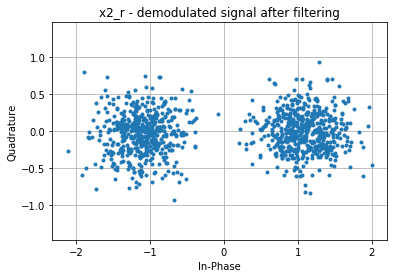

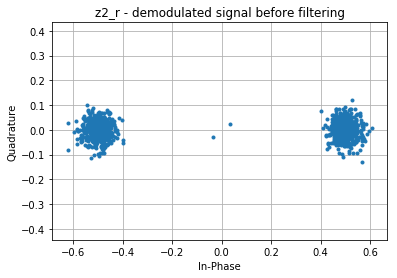

In [13]:
# Before filtering
yI, yQ = ss.scatter(x2_r, Ns, 10*Ns);
plt.plot(yI,yQ,'.');
plt.axis('equal');
plt.ylabel("Quadrature");
plt.xlabel("In-Phase");
plt.title("x2_r - demodulated signal after filtering");
plt.grid();
plt.show();

# After filtering
yI, yQ = ss.scatter(z2_r, Ns, 10*Ns);
plt.plot(yI,yQ,'.');
plt.axis('equal');
plt.ylabel("Quadrature");
plt.xlabel("In-Phase");
plt.title("z2_r - demodulated signal before filtering");
plt.grid();
plt.show();

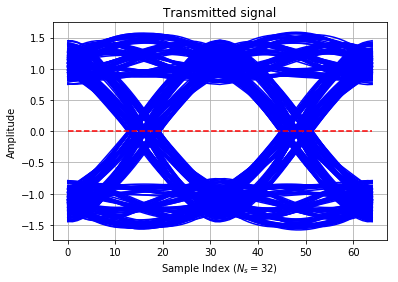

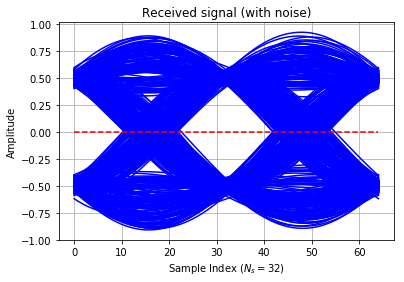

In [14]:
ss.eye_plot(x2, 2*Ns, 12*Ns);
plt.plot([0, 2*Ns], [0, 0], 'r--');
plt.xlabel('Sample Index ($N_s = ' + repr(Ns) + '$)');
plt.title("Transmitted signal");

ss.eye_plot(num.real(z2_r), 2*Ns, 12*Ns);
plt.plot([0, 2*Ns], [0, 0], 'r--');
plt.xlabel('Sample Index ($N_s = ' + repr(Ns) + '$)');
plt.title("Received signal (with noise)");

## ADC converter

In [15]:
zz = ss.downsample(z2_r[12*Ns::], Ns, 0);        # Donwsample
zz = num.ceil(zz.real);
#zz = ss.simpleQuant(num.ceil(zz.real), 12, 5, 'sat');

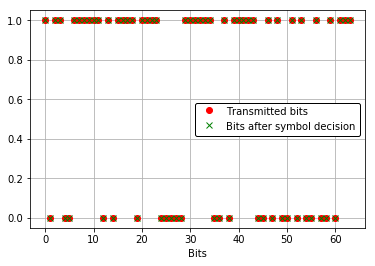

In [16]:
plt.figure;
bits = num.arange(0, 2*Ns);
plt.stem(d2[0:2*Ns], linefmt=" ", markerfmt='ro', basefmt=" ");
plt.stem(zz[0:2*Ns], linefmt=" ", markerfmt='gx', basefmt=" ");
plt.grid();
plt.xlabel(r'Bits');
plt.legend(['Transmitted bits', 'Bits after symbol decision'], 
           framealpha = 1, edgecolor = 'k');

In [17]:
BER = num.sum(num.abs(d2[0:-12] - zz))/(N-12);
print(r"BER = " + repr(BER));

BER = 0.0


## System Simulation

In [18]:
import scipy.special as sp
EbN0dB  = num.arange(-4,12,2);         # Eb/N0 range in dB for simulation.
EbN0lin = 10**(EbN0dB/10);             # converting dB values to linear scale
BER     = num.zeros(num.size(EbN0dB)); # for SER values for each Eb/N0

In [19]:
theoricalBER = 0.5 * sp.erfc(num.sqrt(EbN0lin));
for i in range(len(EbN0dB)):
    r2_c = ss.cpx_AWGN(x2_c, EbN0dB[i], Ns);
    x2_r = r2_c*num.cos(2*num.pi*Fc1*t1);     # demodulated signal with noise
    z2_r = signal.lfilter(b2, 1, x2_r);       # filtered signal
    zz = ss.downsample(z2_r[12*Ns:-12*Ns:], Ns, 0);        # Donwsample
    zz = num.ceil(zz.real);
    ##zz = ss.simpleQuant(num.ceil(zz.real), 12, 5, 'sat');
    BER[i] = num.sum(num.abs(d2[:-12*2:] - zz))/(N-12);    

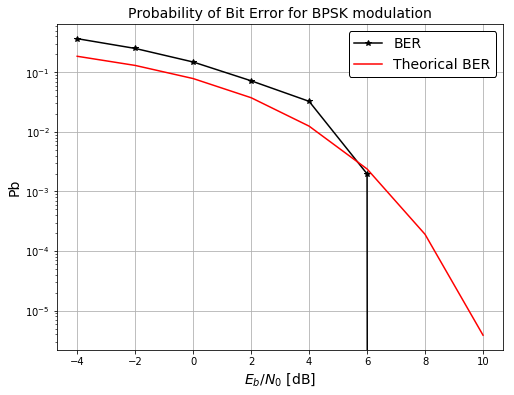

In [20]:
plt.figure(figsize=(8,6));
plt.semilogy(EbN0dB, BER, 'k*-', EbN0dB, theoricalBER, 'r-');
plt.title("Probability of Bit Error for BPSK modulation", fontsize = 14);
plt.xlabel("$E_b/N_0$ [dB]", fontsize = 14);
plt.ylabel("Pb"            , fontsize = 14);
plt.legend(['BER', 'Theorical BER'], framealpha = 1, edgecolor = 'k', fontsize = 14);
plt.grid(True);
plt.show();

In [21]:
BER

array([0.36758893, 0.25197628, 0.14920949, 0.07213439, 0.0326087 ,
       0.00197628, 0.        , 0.        ])